In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data=pd.read_csv("Crime_Data_from_2020_to_Present.csv")
print(data.shape)
data.head()

(677905, 28)


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


C:\Users\Pandora\AppData\Local\Temp\ipykernel_8104\2227246843.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),cmap='coolwarm')


<Axes: >

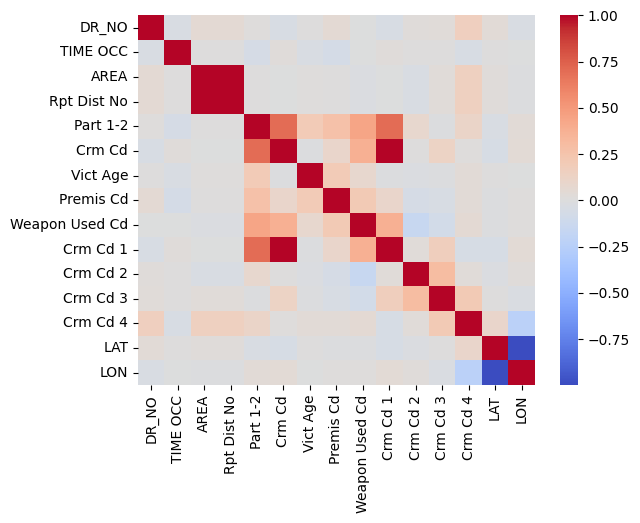

In [9]:
import seaborn as sns
sns.heatmap(data.corr(),cmap='coolwarm')

In [5]:
data=data.drop(['DR_NO','Crm Cd Desc','AREA NAME','Premis Desc','Weapon Desc','Status Desc','Mocodes','LAT','LON','LOCATION','Cross Street','Vict Descent','Crm Cd 1','Crm Cd 2','Crm Cd 3','Crm Cd 4'],axis=1)
crime_counts = data['Crm Cd'].value_counts()
threshold = 1000
negligible_crime_codes = crime_counts[crime_counts <= threshold].index.tolist()
data = data[~data['Crm Cd'].isin(negligible_crime_codes)]
print(data.shape)
data.head()

(659622, 12)


,Date Rptd,DATE OCC,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Vict Sex,Premis Cd,Weapon Used Cd,Status
0,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,377,2,624,36,F,501.0,400.0,AO
1,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,163,2,624,25,M,102.0,500.0,IC
3,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,1543,2,745,76,F,502.0,NaN,IC
4,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,1998,2,740,31,X,409.0,NaN,IC
5,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,30,1,163,1,121,25,F,735.0,500.0,IC


Mean of Data: 13461.673469387755 
Skewness of data :  1.6154890828390516 
Kurtosis of data :  2.0767431849393554


Text(0, 0.5, 'Frequencies of Data')

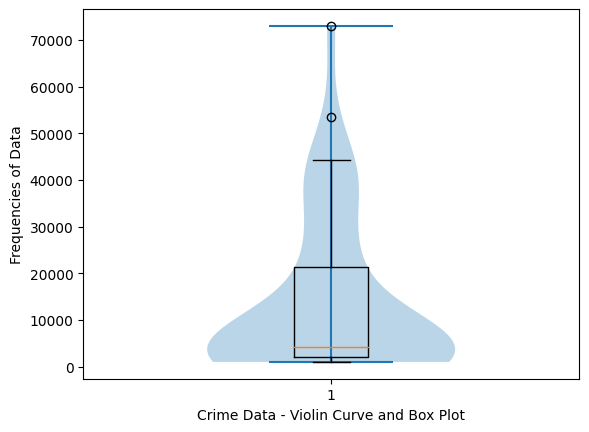

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('E:\ProjectMCA\PBL_V0.1\Cleaned_Data.csv',index_col='ID')
Crimes=pd.DataFrame(data.groupby('Crm Cd').size(),columns=['Count'])
print('Mean of Data:',Crimes.Count.mean(),'\nSkewness of data : ',Crimes.Count.skew(),'\nKurtosis of data : ',Crimes.Count.kurtosis())
plt.violinplot(Crimes)
plt.boxplot(Crimes)
plt.xlabel('Crime Data - Violin Curve and Box Plot')
plt.ylabel('Frequencies of Data')

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('E:\ProjectMCA\PBL_V0.1\Cleaned_Data.csv',index_col='ID')
# print(data.groupby('Status').size())
for name,group in data.groupby('Status'):
    group=group.groupby('Crm Cd').size().sort_values(ascending=False)
    print(name,'\n',group.head())

AA 
 Crm Cd
230    8308
626    7348
740    4047
210    3894
310    3437
dtype: int64
AO 
 Crm Cd
626    14024
624    13237
230     6103
930     3866
236     3728
dtype: int64
CC 
 Crm Cd
350    1
dtype: int64
IC 
 Crm Cd
510    67889
354    43567
330    41763
310    36671
624    36210
dtype: int64
JA 
 Crm Cd
210    410
230    369
624    273
740    112
510     93
dtype: int64
JO 
 Crm Cd
624    386
230     57
930     50
442     50
860     42
dtype: int64


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('E:\ProjectMCA\PBL_V0.1\Cleaned_Data.csv',index_col='ID')
for name,group in data.groupby('Weapon Used Cd'):
    if group.size>20000:
        group=group.groupby('Crm Cd').size().sort_values(ascending=False)
        print(name,'\n',group.head())

102.0 
 Crm Cd
230    5517
210    4242
761    1891
753     738
220     481
dtype: int64
106.0 
 Crm Cd
230    2201
753     738
251     668
210     387
761     278
dtype: int64
109.0 
 Crm Cd
230    2334
210    1472
761     500
753     286
110     180
dtype: int64
200.0 
 Crm Cd
230    1916
761    1483
210     803
236     294
220     191
dtype: int64
207.0 
 Crm Cd
230    1724
761    1204
210     662
236     259
220     156
dtype: int64
212.0 
 Crm Cd
230    1093
236     194
210     107
740      94
624      55
dtype: int64
306.0 
 Crm Cd
740    520
230    503
624    231
745    149
310    134
dtype: int64
307.0 
 Crm Cd
230    1769
236     281
210      69
740      42
624      20
dtype: int64
312.0 
 Crm Cd
230    1104
210     144
740     143
761     123
236      83
dtype: int64
400.0 
 Crm Cd
624    48162
626    32432
210    10186
236     5531
230     5103
dtype: int64
500.0 
 Crm Cd
230    4310
624    4094
310    3354
330    1986
626    1434
dtype: int64
511.0 
 Crm Cd
930    12785
210 

<Figure size 1000x400 with 0 Axes>

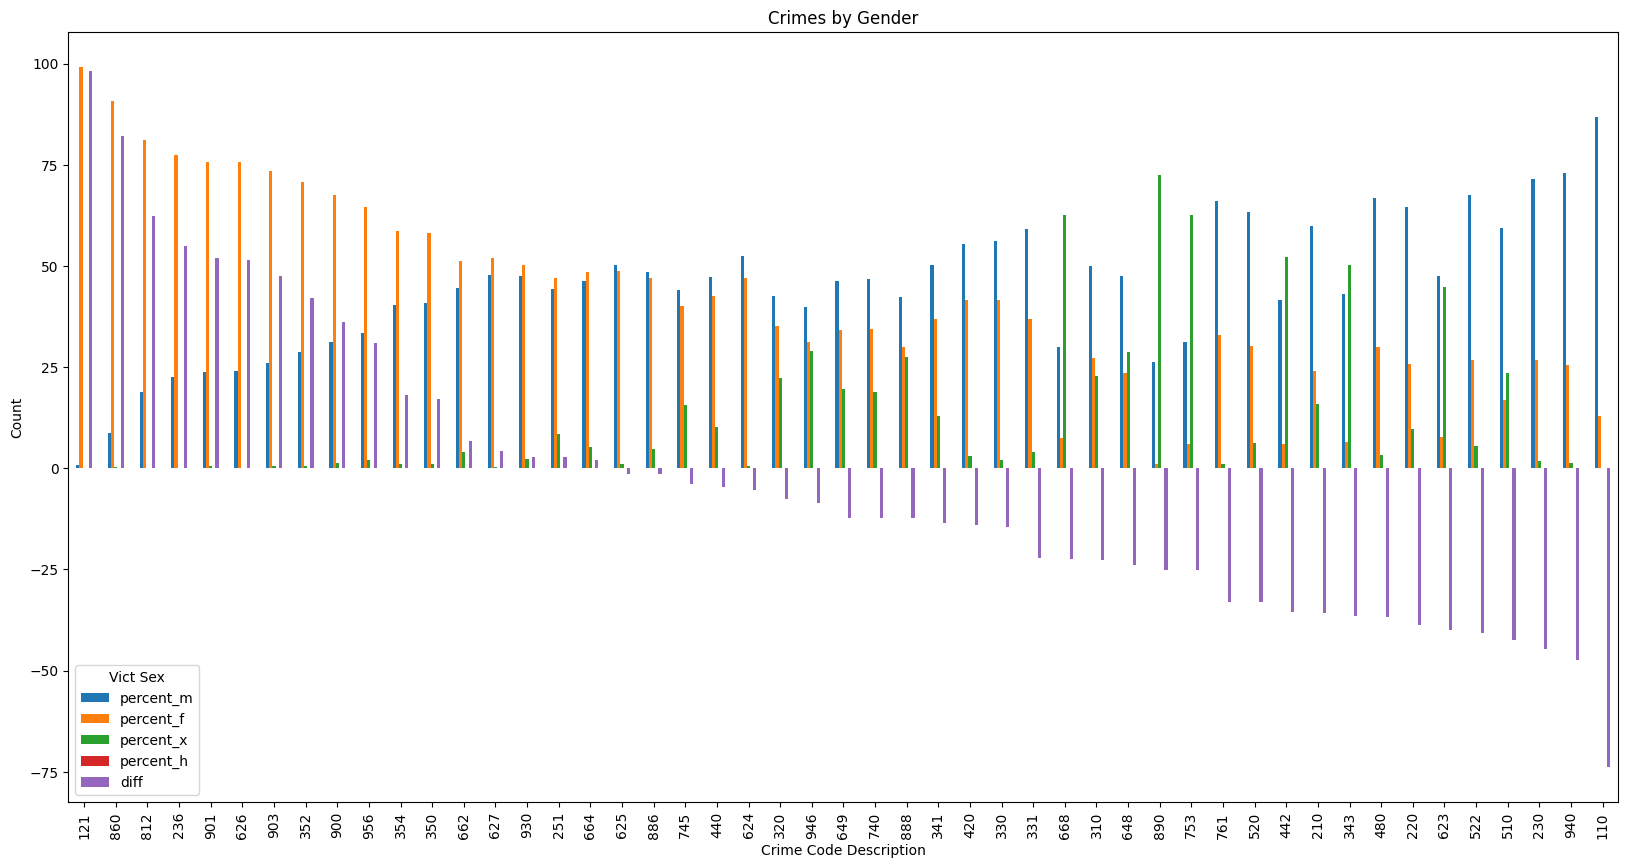

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('E:\ProjectMCA\PBL_V0.1\Cleaned_Data.csv',index_col='ID')
plt.figure(figsize=(10,4))
# Group the data with respect to Crm Cd and Vict Sex and plot the bar graph
import matplotlib.pyplot as plt
gencrm=data.groupby(['Crm Cd','Vict Sex']).size().unstack()
# gencrm['H']=gencrm['H'].fillna(gencrm['H'].mean)
# gencrm['X']=gencrm['H'].fillna(gencrm['X'].mean)
# gencrm['H']=gencrm['F'].fillna(gencrm['F'].mean)
# gencrm['X']=gencrm['M'].fillna(gencrm['M'].mean)
gencrm=gencrm.fillna(0)
percent_data=gencrm.copy()
percent_data['percent_m'] = (gencrm['M'] / (gencrm['F'] + gencrm['M']+gencrm['H']+gencrm['X'])) * 100
percent_data['percent_f'] = (gencrm['F'] / (gencrm['F'] + gencrm['M']+gencrm['H']+gencrm['X'])) * 100
percent_data['percent_x'] = (gencrm['X'] / (gencrm['F'] + gencrm['M']+gencrm['H']+gencrm['X'])) * 100
percent_data['percent_h'] = (gencrm['H'] / (gencrm['F'] + gencrm['M']+gencrm['H']+gencrm['X'])) * 100
percent_data = percent_data.drop(['F', 'M','H','X'], axis=1)
percent_data_sorted = percent_data.assign(diff=(percent_data['percent_f'] - percent_data['percent_m'])).sort_values(by='diff', ascending=False)
percent_data_sorted.plot(kind='bar',stacked=False,xlabel="Crime Code Description",ylabel="Count",title="Crimes by Gender",figsize=(20,10))
plt.show()

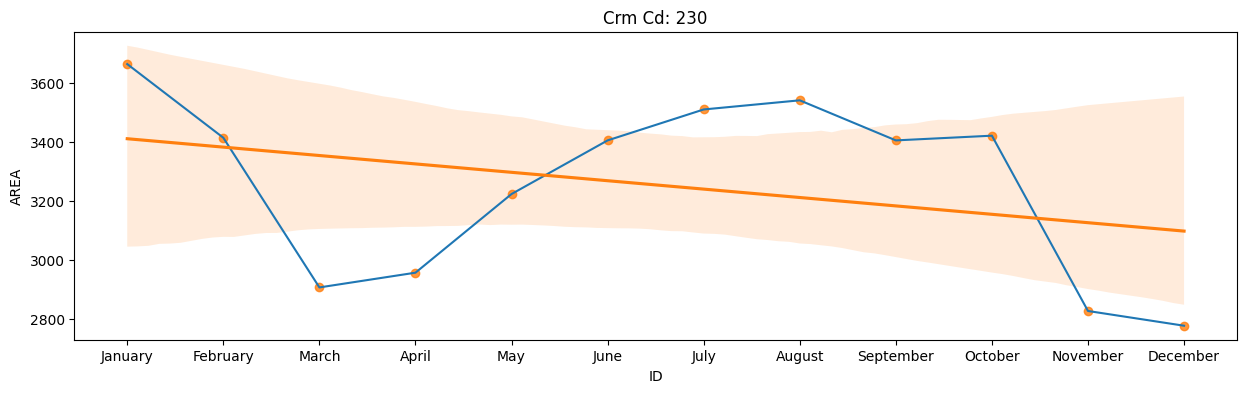

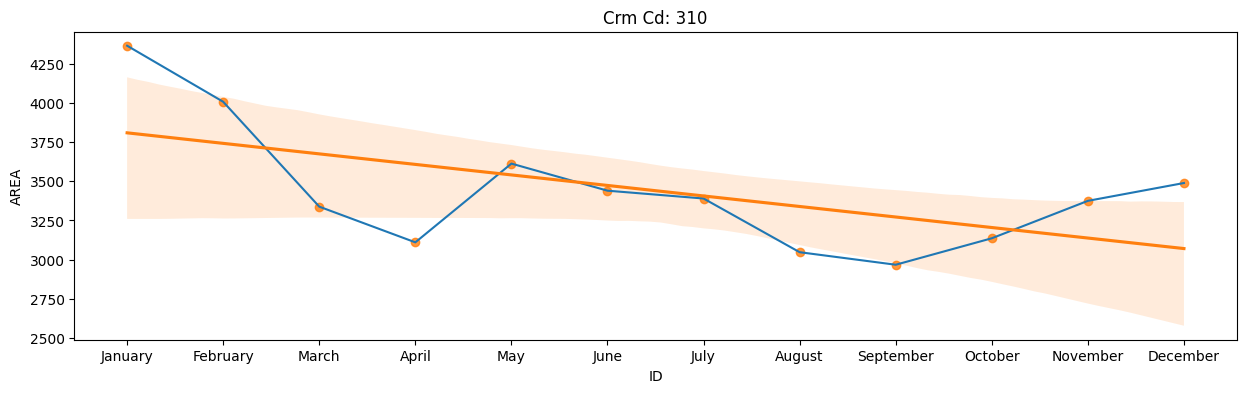

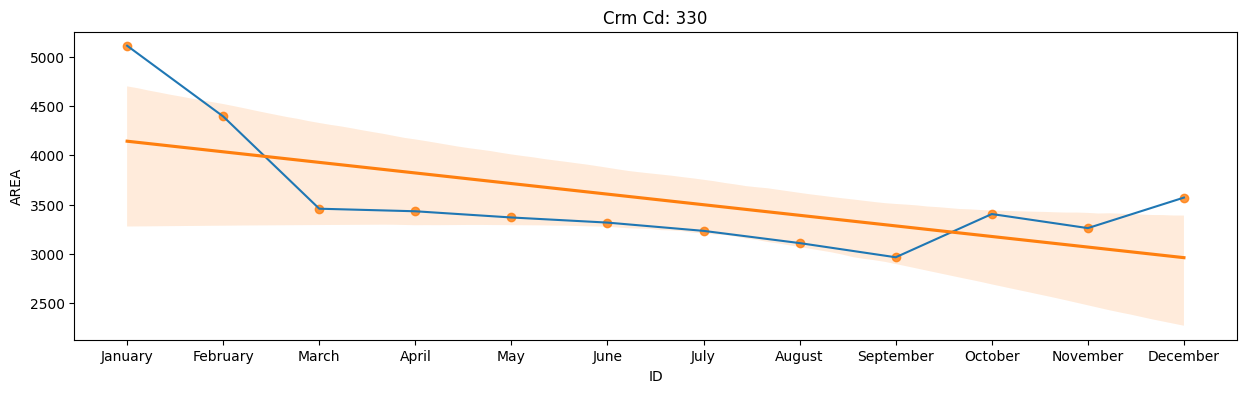

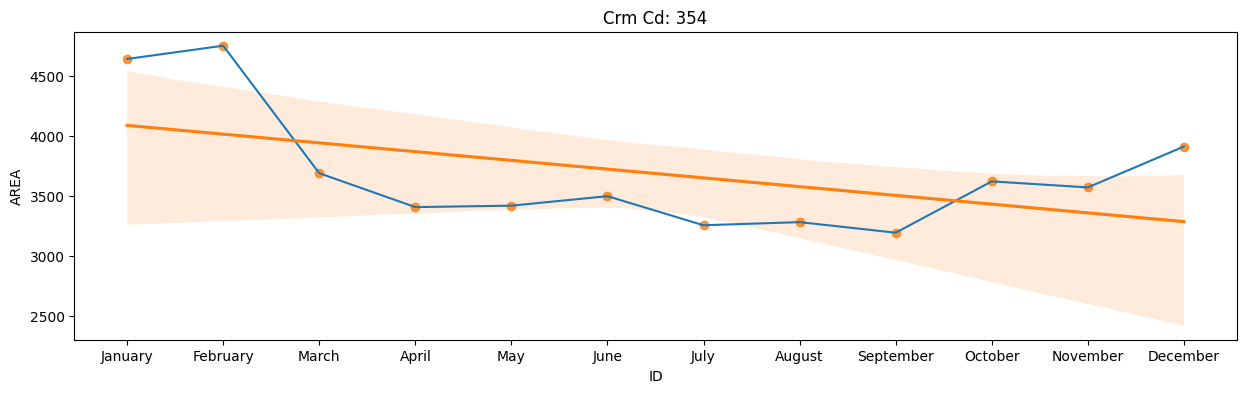

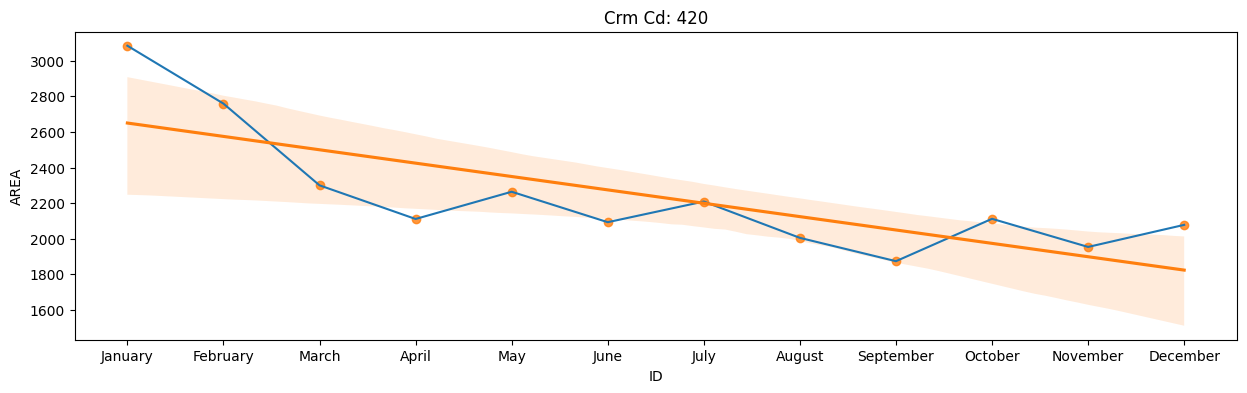

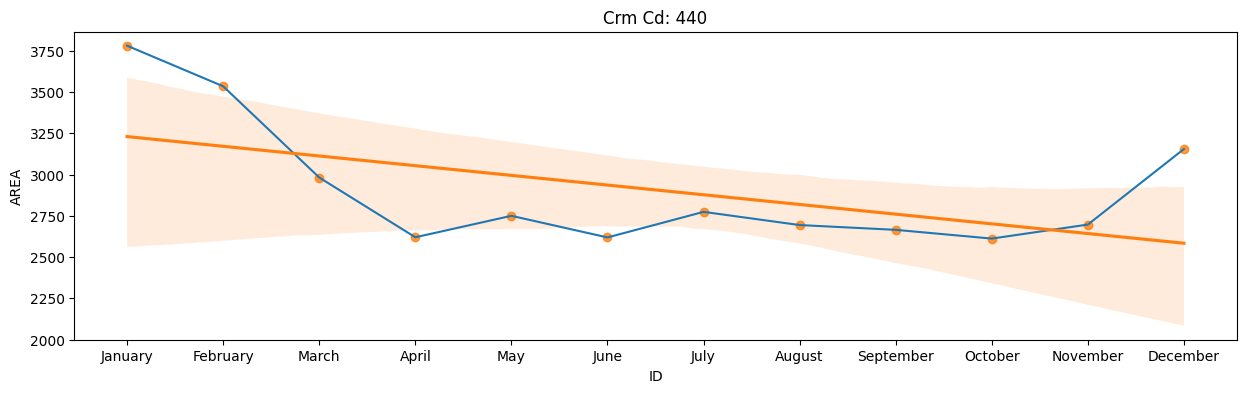

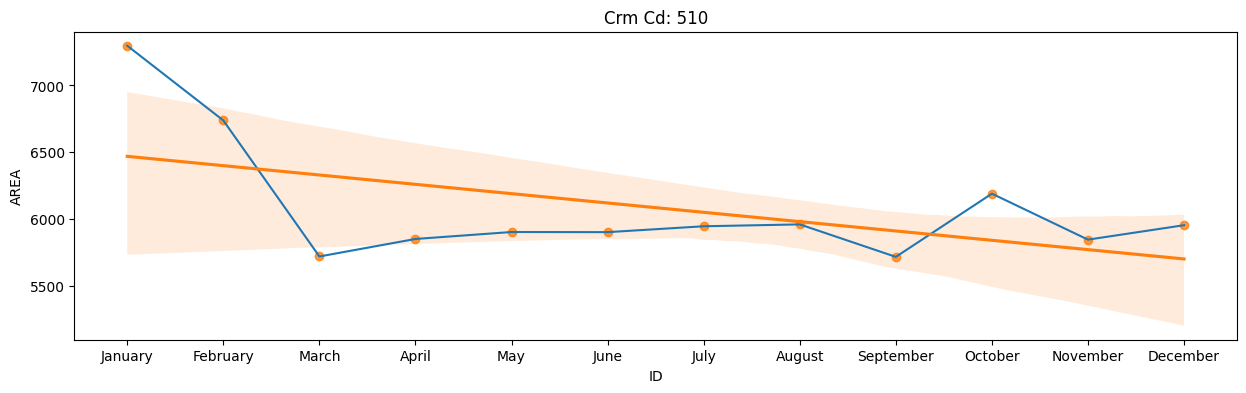

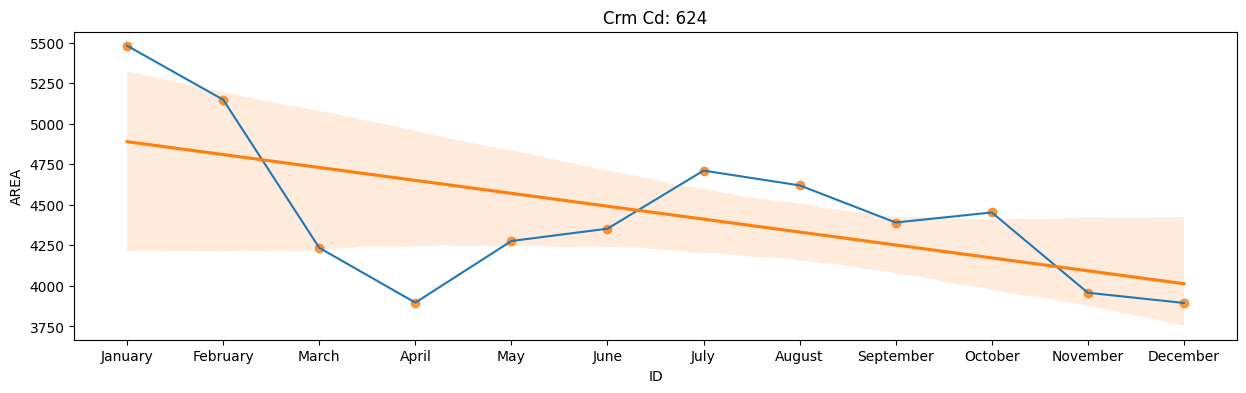

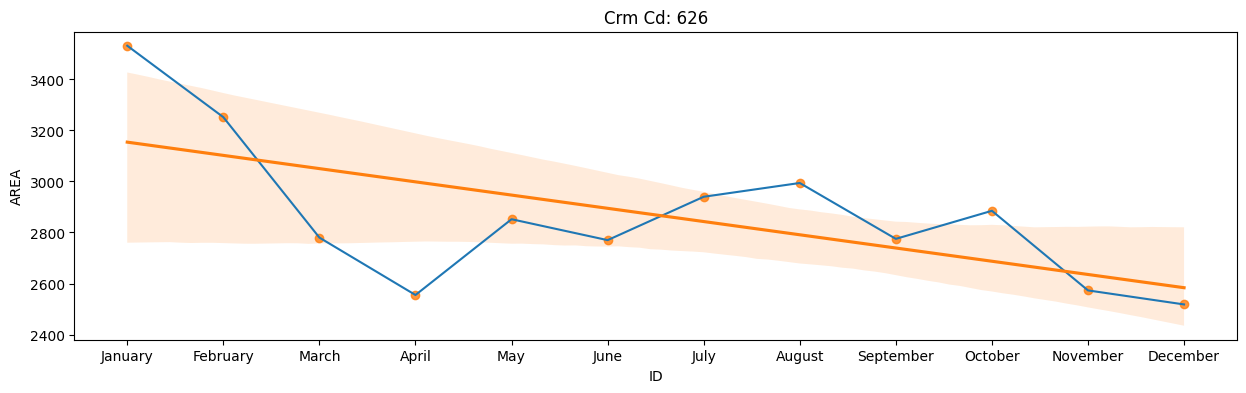

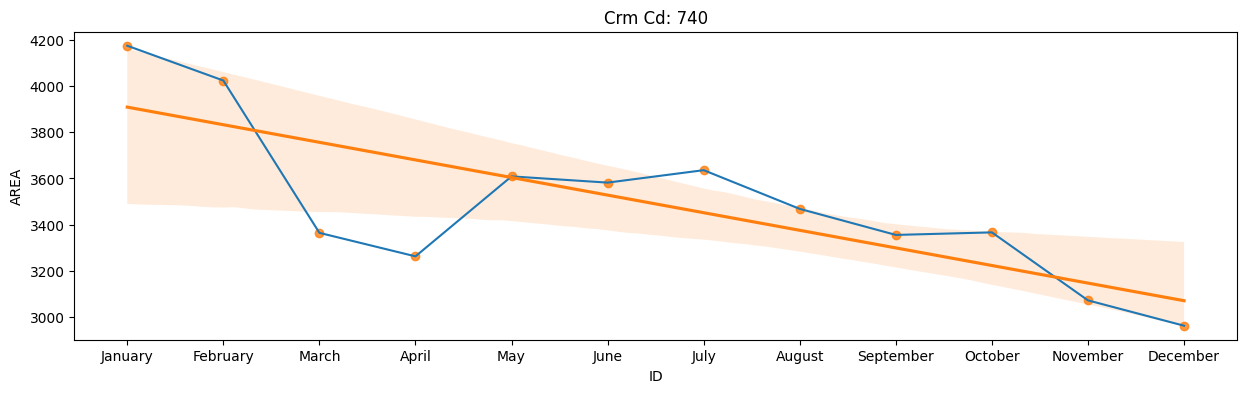

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('E:\ProjectMCA\PBL_V0.1\Cleaned_Data.csv',index_col='ID')
crm=data.groupby('Crm Cd')
for name,group in crm:
    if group.size>300000:
        plt.figure(figsize=(15,4))
        group['DATE OCC']=pd.to_datetime(group['DATE OCC'])
        group['DATE OCC']=group['DATE OCC'].dt.month
        group=group.groupby('DATE OCC').count()
        group.index=pd.Categorical(group.index)
        group['ID']=group.index.codes
        sns.lineplot(x='ID',y='AREA',data=group)
        sns.regplot(x='ID',y='AREA',data=group)
        plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],labels=['January','February','March','April','May','June','July','August','September','October','November','December'])
        plt.title(f'Crm Cd: {name}')
        plt.show()

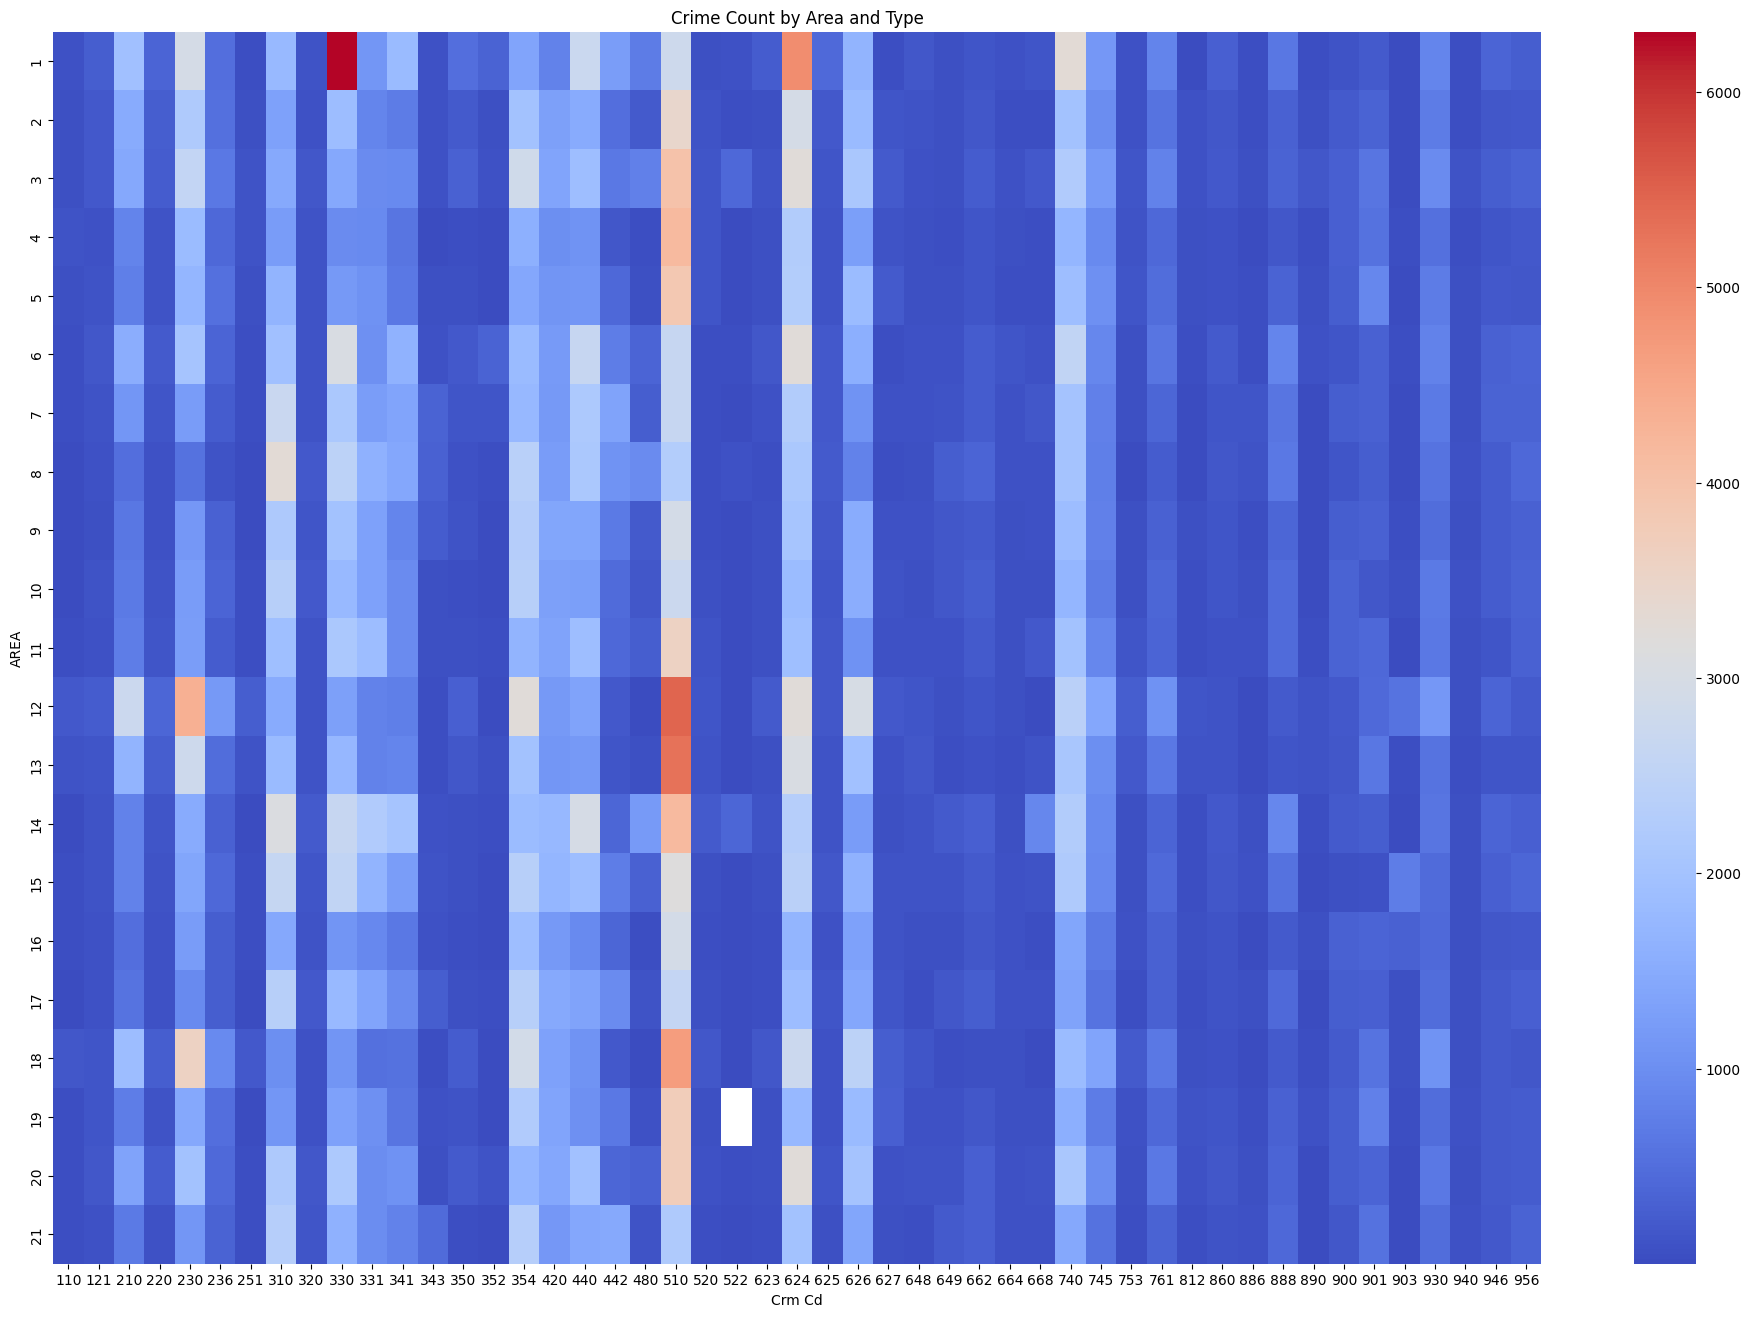

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('E:\ProjectMCA\PBL_V0.1\Cleaned_Data.csv',index_col='ID')
AreaWise=df.groupby(['AREA','Crm Cd']).size().unstack()
plt.figure(figsize=(24,16))
sns.heatmap(AreaWise, cmap="coolwarm")
plt.title('Crime Count by Area and Type')
plt.show()

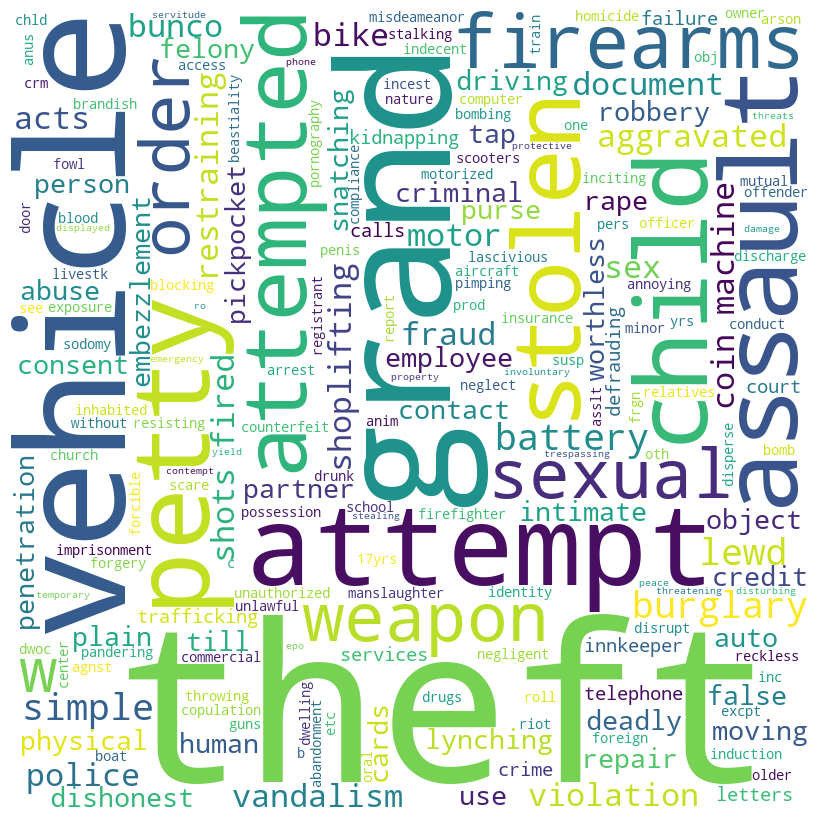

In [10]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
df2 = pd.read_csv('E:\ProjectMCA\PBL_V0.1\Cleaned_Data.csv')
df=pd.read_csv('E:\ProjectMCA\PBL_V0.1\Crm-Desc.csv')
df.merge(df2,how='inner',on='Crm Cd')
comment_words = ''
stopwords = set(STOPWORDS)
for val in df.Desc:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)                    
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [1]:
import pandas as pd
import folium
df=pd.read_csv('E:\ProjectMCA\PBL_V0.1\Crime_Data_from_2020_to_Present.csv')
crmdt=pd.read_csv('E:\ProjectMCA\PBL_V0.1\Crm-Desc.csv')
grouped_data = df.groupby('Crm Cd').mean().reset_index()
map_center = [grouped_data['LAT'].mean(), grouped_data['LON'].mean()]
m = folium.Map(location=map_center, min_zoom=11,max_zoom=11,zoom_start=11,tiles='cartodbpositron')
color_palette = ['blue', 'green', 'purple', 'orange', 'red', 'darkblue', 'lightgreen', 'black', 'pink']
for index, row in grouped_data.iterrows():
    group_size = len(df[df['Crm Cd'] == row['Crm Cd']])
    if group_size>10000:
        folium.CircleMarker(location=[row['LAT'], row['LON']],
                        radius=group_size**(1/2.5),
                        color=color_palette[index % len(color_palette)],
                        fill_color=color_palette[index % len(color_palette)],
                  popup=crmdt[crmdt['Crm Cd']==row['Crm Cd']]['Desc']).add_to(m)
m

C:\Users\Pandora\AppData\Local\Temp\ipykernel_12176\430875254.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = df.groupby('Crm Cd').mean().reset_index()


In [3]:
import pandas as pd
import folium
import seaborn as sns
import random

df = pd.read_csv('E:\ProjectMCA\PBL_V0.1\Crime_Data_from_2020_to_Present.csv')
crmdt = pd.read_csv('E:\ProjectMCA\PBL_V0.1\Crm-Desc.csv')

grouped_data = df.groupby('Crm Cd').mean(numeric_only=True).reset_index()
map_center = [grouped_data['LAT'].mean(), grouped_data['LON'].mean()]
m = folium.Map(location=map_center, min_zoom=9, max_zoom=12, zoom_start=11, tiles='cartodbpositron')

num_colors = len(grouped_data)
color_palette = sns.color_palette("hls", num_colors)
random.shuffle(color_palette)

for index, row in grouped_data.iterrows():
    group_size = len(df[df['Crm Cd'] == row['Crm Cd']])
    if group_size > 10000:
        color = '#%02x%02x%02x' % (int(color_palette[index][0] * 255), int(color_palette[index][1] * 255), int(color_palette[index][2] * 255))
        
        folium.CircleMarker(
            location=[row['LAT'], row['LON']],
            radius=group_size**(1/2.5),
            color=color,
            fill_color=color,
            # popup=crmdt[crmdt['Crm Cd'] == row['Crm Cd']]['Desc']
            popup=folium.Popup(crmdt[crmdt['Crm Cd'] == row['Crm Cd']]['Desc'].iloc[0], max_width=200)
        ).add_to(m)
        legend_icon = folium.DivIcon(
            icon_size=(150, 36),
            icon_anchor=(7, 20),
            html='<div style="font-size: 8pt; background-color: white; padding: 5px; border: 1px solid gray;">'
                 f'<span style="color: {color}">&#9679;</span> {crmdt[crmdt["Crm Cd"] == row["Crm Cd"]]["Desc"].iloc[0]}</div>'
        )
        folium.Marker(
            location=[row['LAT'], row['LON']],
            icon=legend_icon
        ).add_to(m)
m.add_child(folium.map.LayerControl())

m.save('map_v1.html')
m
